In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error , mean_absolute_error, explained_variance_score

#import warnings

#warning.simplefilter(action = 'ignore', category = FutureWarning)
#warnings.filterwarnings('ignore')

In [2]:
df_name = pd.read_csv('players_20.csv')
name = df_name.filter(['short_name'], axis = 1)
name

,short_name
0,L. Messi
1,Cristiano Ronaldo
2,Neymar Jr
3,J. Oblak
4,E. Hazard
...,...
18273,Shao Shuai
18274,Xiao Mingjie
18275,Zhang Wei
18276,Wang Haijian


In [3]:
df_name

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [4]:
df = pd.read_csv('players_20.csv')
df = df.drop(['player_url', 'long_name', 'dob', 'club', 'nationality', 'gk_diving',
              'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
             'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
              'goalkeeping_reflexes', 'release_clause_eur', 'player_tags', 'contract_valid_until', 
              'nation_jersey_number', 'joined', 'loaned_from',  'wage_eur', 'team_position',
             'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'], axis=1)
df = df[df["player_positions"].str.contains("GK|SUB|RES") == False]


In [5]:
df

,sofifa_id,short_name,age,height_cm,weight_kg,overall,potential,value_eur,player_positions,preferred_foot,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,158023,L. Messi,32,170,72,94,94,95500000,"RW, CF, ST",Left,...,94,48,40,94,94,75,96,33,37,26
1,20801,Cristiano Ronaldo,34,187,83,93,93,58500000,"ST, LW",Right,...,93,63,29,95,82,85,95,28,32,24
2,190871,Neymar Jr,27,175,68,92,92,105500000,"LW, CAM",Right,...,84,51,36,87,90,90,94,27,26,29
4,183277,E. Hazard,28,175,74,91,91,90000000,"LW, CF",Right,...,80,54,41,87,89,88,91,34,27,22
5,192985,K. De Bruyne,28,181,70,91,91,90000000,"CAM, CM",Right,...,90,76,61,88,94,79,91,68,58,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,Shao Shuai,22,186,79,48,56,40000,CB,Right,...,16,46,48,28,25,39,41,45,50,52
18274,250995,Xiao Mingjie,22,177,66,48,56,40000,CB,Right,...,20,42,49,23,25,37,35,42,53,57
18275,252332,Zhang Wei,19,186,75,48,56,40000,CM,Right,...,26,50,45,38,38,36,39,46,52,46
18276,251110,Wang Haijian,18,185,74,48,54,40000,CM,Right,...,28,57,49,31,48,36,40,39,44,54


In [6]:
df = df.drop(['player_positions' , 'preferred_foot', 'short_name', 'body_type', 'real_face', 'team_jersey_number',
             'nation_position', 'player_traits', 'work_rate'], axis=1)

In [7]:
df_raw = df.copy()
df_raw = df_raw.fillna(0)
df_raw['index'] = df_raw.index
df_raw

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,index
0,158023,32,170,72,94,94,95500000,5,4,4,...,48,40,94,94,75,96,33,37,26,0
1,20801,34,187,83,93,93,58500000,5,4,5,...,63,29,95,82,85,95,28,32,24,1
2,190871,27,175,68,92,92,105500000,5,5,5,...,51,36,87,90,90,94,27,26,29,2
4,183277,28,175,74,91,91,90000000,4,4,4,...,54,41,87,89,88,91,34,27,22,4
5,192985,28,181,70,91,91,90000000,4,5,4,...,76,61,88,94,79,91,68,58,51,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,22,186,79,48,56,40000,1,3,2,...,46,48,28,25,39,41,45,50,52,18273
18274,250995,22,177,66,48,56,40000,1,2,2,...,42,49,23,25,37,35,42,53,57,18274
18275,252332,19,186,75,48,56,40000,1,2,2,...,50,45,38,38,36,39,46,52,46,18275
18276,251110,18,185,74,48,54,40000,1,2,2,...,57,49,31,48,36,40,39,44,54,18276


<Axes: >

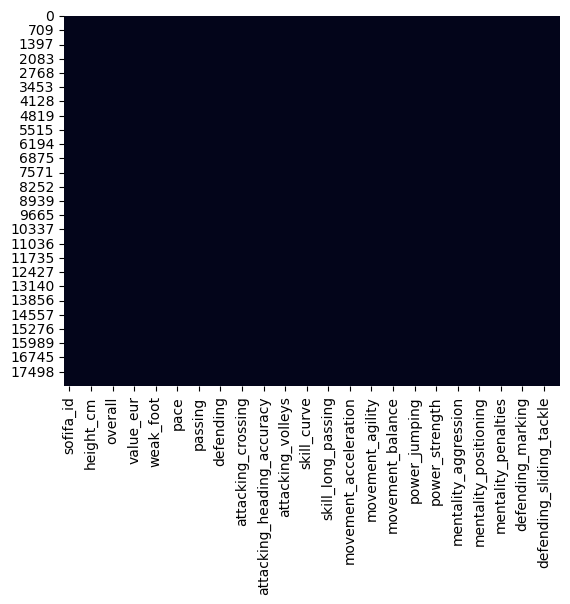

In [8]:
sns.heatmap(df_raw.isnull(), cbar=False)

In [9]:
df_raw.drop(['value_eur', 'sofifa_id'], axis=1, inplace=True)


In [10]:
group = df_raw.copy()
group

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,index
0,32,170,72,94,94,5,4,4,87.0,92.0,...,48,40,94,94,75,96,33,37,26,0
1,34,187,83,93,93,5,4,5,90.0,93.0,...,63,29,95,82,85,95,28,32,24,1
2,27,175,68,92,92,5,5,5,91.0,85.0,...,51,36,87,90,90,94,27,26,29,2
4,28,175,74,91,91,4,4,4,91.0,83.0,...,54,41,87,89,88,91,34,27,22,4
5,28,181,70,91,91,4,5,4,76.0,86.0,...,76,61,88,94,79,91,68,58,51,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,56,1,3,2,57.0,23.0,...,46,48,28,25,39,41,45,50,52,18273
18274,22,177,66,48,56,1,2,2,58.0,24.0,...,42,49,23,25,37,35,42,53,57,18274
18275,19,186,75,48,56,1,2,2,54.0,35.0,...,50,45,38,38,36,39,46,52,46,18275
18276,18,185,74,48,54,1,2,2,59.0,35.0,...,57,49,31,48,36,40,39,44,54,18276


In [11]:
## define PCA

num_pca_min_initial = 4
num_pca = 4
num_cluster = 25



def PCA_short(group):
    df_group = group.copy()
    df_comp_group = group.copy()
    
    scaler_group = StandardScaler()
    scaler_group.fit(group)
    scaled_data_group = scaler_group.transform(group)
    
    pca_group = PCA(n_components = num_pca)
    pca_group.fit(scaled_data_group)
    x_pca_group = pca_group.transform(scaled_data_group)
    df_comp_group = pd.DataFrame(pca_group.components_)
    
    return x_pca_group

df_short_pca = PCA_short(df)

In [12]:
    ## i pulled the written commands from function

    
    df_group = group.copy()
    df_comp_group = group.copy()
    
    scaler_group = StandardScaler()
    scaler_group.fit(group)
    scaled_data_group = scaler_group.transform(group)
    
    pca_group = PCA(n_components = num_pca)
    pca_group.fit(scaled_data_group)
    x_pca_group = pca_group.transform(scaled_data_group)
    df_comp_group = pd.DataFrame(pca_group.components_)
    


In [13]:
df_comp_group

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.070429,-0.085595,-0.053805,0.174517,0.117308,0.093156,0.088520,0.185357,0.121988,0.215928,...,0.020081,-0.025920,0.208910,0.214036,0.172775,0.174208,-0.029766,-0.043640,-0.050920,-0.170597
1,0.150915,0.149676,0.164362,0.188687,0.080660,0.092748,-0.011904,-0.039446,-0.138267,-0.059590,...,0.259362,0.273538,-0.065571,0.008432,-0.048543,0.150589,0.266438,0.266384,0.256072,-0.184627
2,0.108360,0.272830,0.282031,0.038375,-0.031888,0.055836,0.037239,-0.008233,-0.185165,0.177847,...,-0.020523,-0.209258,0.083179,-0.009591,0.200694,0.058237,-0.204883,-0.226881,-0.242530,-0.036219
3,0.106481,-0.094797,-0.110577,-0.109711,-0.141081,0.035284,0.009868,-0.012770,-0.382295,0.018759,...,-0.074734,0.057331,-0.020465,0.145775,0.062165,0.008870,0.046113,0.064771,0.061089,0.112037


In [14]:
len(scaled_data_group)

16242

In [15]:
## Create Clusters

def kcentroid(df_raw):
    kmeans_df = KMeans(n_clusters = num_cluster)
    kmeans_df.fit(df_raw)
    
    centroids_df = kmeans_df.cluster_centers_
    labels_df = kmeans_df.labels_
    
    clusters_df = pd.DataFrame(labels_df)
    clusters_df['cluster'] = clusters_df
    clusters_df = clusters_df.assign(rec_id = np.arange(len(clusters_df))).reset_index(drop=True)
    
    return clusters_df
cll = kcentroid(df_short_pca)

C:\Users\Yetpower\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
    kmeans_df = KMeans(n_clusters = num_cluster)
    kmeans_df.fit(df_raw)
    
    centroids_df = kmeans_df.cluster_centers_
    labels_df = kmeans_df.labels_
    
    clusters_df = pd.DataFrame(labels_df)
    clusters_df['cluster'] = clusters_df
    clusters_df = clusters_df.assign(rec_id = np.arange(len(clusters_df))).reset_index(drop=True)
    

C:\Users\Yetpower\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
#Create record id and assign clusters

df2 = df_raw.assign(rec_id = np.arange(len(df_raw))).reset_index(drop=True)
cl2 = cll.drop([0], axis=1)
cl3 = df2.merge(cl2, on="rec_id", how="inner", validate="1:1")
cl3.drop(['rec_id'], axis=1, inplace=True)

In [18]:
cl3

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,...,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,index,cluster
0,32,170,72,94,94,5,4,4,87.0,92.0,...,40,94,94,75,96,33,37,26,0,3
1,34,187,83,93,93,5,4,5,90.0,93.0,...,29,95,82,85,95,28,32,24,1,3
2,27,175,68,92,92,5,5,5,91.0,85.0,...,36,87,90,90,94,27,26,29,2,3
3,28,175,74,91,91,4,4,4,91.0,83.0,...,41,87,89,88,91,34,27,22,4,3
4,28,181,70,91,91,4,5,4,76.0,86.0,...,61,88,94,79,91,68,58,51,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,22,186,79,48,56,1,3,2,57.0,23.0,...,48,28,25,39,41,45,50,52,18273,9
16238,22,177,66,48,56,1,2,2,58.0,24.0,...,49,23,25,37,35,42,53,57,18274,9
16239,19,186,75,48,56,1,2,2,54.0,35.0,...,45,38,38,36,39,46,52,46,18275,9
16240,18,185,74,48,54,1,2,2,59.0,35.0,...,49,31,48,36,40,39,44,54,18276,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_raw, df['value_eur'], test_size=0.30, random_state=101)


In [20]:
X_test

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,index
11284,23,188,78,64,73,1,3,2,61.0,30.0,...,54,65,27,35,40,47,65,68,66,11284
3772,33,190,86,72,72,1,2,3,58.0,71.0,...,76,44,79,64,71,74,45,46,39,3772
6231,36,186,78,69,69,1,4,3,66.0,70.0,...,43,41,72,54,76,71,40,22,17,6231
10222,23,177,68,65,72,1,4,3,71.0,57.0,...,34,30,61,62,48,55,34,27,25,10222
619,24,180,73,79,83,2,4,4,75.0,73.0,...,68,73,75,78,68,78,65,73,70,619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,24,181,73,70,76,1,3,3,66.0,52.0,...,76,67,55,60,44,53,70,70,67,4936
6984,26,170,71,68,72,1,2,2,70.0,48.0,...,82,67,44,50,46,68,70,72,65,6984
417,24,184,75,80,87,1,3,2,79.0,49.0,...,81,81,64,65,45,76,76,80,80,417
15683,23,185,74,59,66,1,3,2,70.0,58.0,...,38,16,53,48,60,50,18,12,15,15683


In [21]:
### introducing the models.

model_type = 'RF'
#sıra = df_raw.set_index('index')

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

rfr_pred = rfc.predict(X_test)
pred_rfr = pd.DataFrame(rfr_pred.T)

#Put predictions into a dataframe and merge predictions with the actuals

pred_rfr['pred'] = pred_rfr
pred_rfr2 = pred_rfr[['pred']]
y_test_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_rfr3 = pd.concat([pred_rfr2, y_test_df], axis = 1)

pred_rfr3

#Calculate the APE

pred_rfr3['ape'] = abs(pred_rfr3['value_eur'] - pred_rfr3['pred'] )

#Calculate diff btw. the predictions and actual price
#pred_rfr3['indexler'] = sıra
pred_rfr3['diff'] = pred_rfr3['pred'] / pred_rfr3['value_eur'] -1
pred_rfr3['model'] = model_type



In [22]:
1- pred_rfr3['ape'].sum() / pred_rfr3['value_eur'].sum()

0.9370488181411921

In [23]:
df_name.loc[3772, 'value_eur']

2000000

In [24]:
X_test_2 = X_test.copy()

In [25]:
X_test_2

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,index
11284,23,188,78,64,73,1,3,2,61.0,30.0,...,54,65,27,35,40,47,65,68,66,11284
3772,33,190,86,72,72,1,2,3,58.0,71.0,...,76,44,79,64,71,74,45,46,39,3772
6231,36,186,78,69,69,1,4,3,66.0,70.0,...,43,41,72,54,76,71,40,22,17,6231
10222,23,177,68,65,72,1,4,3,71.0,57.0,...,34,30,61,62,48,55,34,27,25,10222
619,24,180,73,79,83,2,4,4,75.0,73.0,...,68,73,75,78,68,78,65,73,70,619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,24,181,73,70,76,1,3,3,66.0,52.0,...,76,67,55,60,44,53,70,70,67,4936
6984,26,170,71,68,72,1,2,2,70.0,48.0,...,82,67,44,50,46,68,70,72,65,6984
417,24,184,75,80,87,1,3,2,79.0,49.0,...,81,81,64,65,45,76,76,80,80,417
15683,23,185,74,59,66,1,3,2,70.0,58.0,...,38,16,53,48,60,50,18,12,15,15683


In [26]:
X_test_2 = X_test_2.reset_index(drop = True) 

In [27]:
pred_rfr3

,pred,value_eur,ape,diff,model
0,643000.0,625000,18000.0,0.028800,RF
1,1648000.0,2000000,352000.0,-0.176000,RF
2,355800.0,375000,19200.0,-0.051200,RF
3,751750.0,750000,1750.0,0.002333,RF
4,15990000.0,16000000,10000.0,-0.000625,RF
...,...,...,...,...,...
4868,2221000.0,2200000,21000.0,0.009545,RF
4869,1004250.0,1000000,4250.0,0.004250,RF
4870,18945000.0,19000000,55000.0,-0.002895,RF
4871,218500.0,220000,1500.0,-0.006818,RF


In [28]:
name = name.reset_index(drop = False) 
name

,index,short_name
0,0,L. Messi
1,1,Cristiano Ronaldo
2,2,Neymar Jr
3,3,J. Oblak
4,4,E. Hazard
...,...,...
18273,18273,Shao Shuai
18274,18274,Xiao Mingjie
18275,18275,Zhang Wei
18276,18276,Wang Haijian


In [29]:
pred_rfr4 = pd.concat([pred_rfr3, X_test_2], axis = 1)[['pred', 'value_eur', 'index']]
pred_rfr4

,pred,value_eur,index
0,643000.0,625000,11284
1,1648000.0,2000000,3772
2,355800.0,375000,6231
3,751750.0,750000,10222
4,15990000.0,16000000,619
...,...,...,...
4868,2221000.0,2200000,4936
4869,1004250.0,1000000,6984
4870,18945000.0,19000000,417
4871,218500.0,220000,15683


In [30]:
pred_rfr5 = pred_rfr4.merge(name, on='index')
pred_rfr5

,pred,value_eur,index,short_name
0,643000.0,625000,11284,S. Nkansah
1,1648000.0,2000000,3772,M. Škoda
2,355800.0,375000,6231,Yuri
3,751750.0,750000,10222,F. Di Mariano
4,15990000.0,16000000,619,M. Sanson
...,...,...,...,...
4868,2221000.0,2200000,4936,R. Echeverría
4869,1004250.0,1000000,6984,Judson
4870,18945000.0,19000000,417,Mario Hermoso
4871,218500.0,220000,15683,M. Mohammed


In [31]:
pred_rfr5.sort_values('value_eur', ascending=False)

,pred,value_eur,index,short_name
2454,70170000.0,80500000,9,M. Salah
4530,62115000.0,67500000,11,K. Koulibaly
2906,59775000.0,64500000,20,R. Lewandowski
4330,62040000.0,60000000,43,H. Son
659,50630000.0,56500000,40,A. Laporte
...,...,...,...,...
2961,4255000.0,0,2894,Y. Banana
586,375250.0,0,13668,C. Howieson
969,206200.0,0,15205,A. Khurana
4657,281550.0,0,13971,H. Bhandari


In [32]:
#Logistic regression

model_type = 'logit'

logit = LogisticRegression()
logit.fit(X_train,y_train)
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(y_train)

#utils.multiclass.type_of_target(encoded)
#logit.fit(X_train,encoded)

#Make predictions
logit_pred = logit.predict(X_test)
pred_logit = pd.DataFrame(logit_pred.T)

#Put predictions into a dataframe and merge predictions with the actuals

pred_logit['pred'] = pred_logit
pred_logit2 = pred_logit[['pred']]
y_test_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_logit3 = pd.concat([pred_logit2, y_test_df], axis = 1)

#Set the APE

pred_logit3['ape'] = abs(pred_logit3['value_eur'] - pred_logit3['pred'] )

#Calculate diff btw. the predictions and actual price

pred_logit3['diff'] = pred_logit3['pred'] / pred_logit3['value_eur'] -1
pred_logit3['model'] = model_type

pred_logit3

C:\Users\Yetpower\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,pred,value_eur,ape,diff,model
0,325000,625000,300000,-0.480000,logit
1,1100000,2000000,900000,-0.450000,logit
2,1100000,375000,725000,1.933333,logit
3,525000,750000,225000,-0.300000,logit
4,6500000,16000000,9500000,-0.593750,logit
...,...,...,...,...,...
4868,1100000,2200000,1100000,-0.500000,logit
4869,1100000,1000000,100000,0.100000,logit
4870,6500000,19000000,12500000,-0.657895,logit
4871,325000,220000,105000,0.477273,logit


In [33]:
# Linear Regression

model_type = 'linreg'

linreg = LinearRegression()
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

#utils.multiclass.type_of_target(encoded)
linreg.fit(X_train,encoded)

#Make predictions
linreg_pred = linreg.predict(X_test)
pred_linreg = pd.DataFrame(linreg_pred.T)

#Put predictions into a dataframe and merge predictions with the actuals

pred_linreg['pred'] = pred_linreg
pred_linreg2 = pred_linreg[['pred']]
y_test_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_linreg3 = pd.concat([pred_linreg2, y_test_df], axis = 1)

#Set the APE

pred_linreg3['ape'] = abs(pred_linreg3['value_eur'] - pred_linreg3['pred'] )

#Calculate diff btw. the predictions and actual price

pred_linreg3['diff'] = pred_linreg3['pred'] / pred_linreg3['value_eur'] -1
pred_linreg3['model'] = model_type
pred_linreg3

,pred,value_eur,ape,diff,model
0,43.247747,625000,6.249568e+05,-0.999931,linreg
1,62.556340,2000000,1.999937e+06,-0.999969,linreg
2,42.652297,375000,3.749573e+05,-0.999886,linreg
3,52.221696,750000,7.499478e+05,-0.999930,linreg
4,120.714066,16000000,1.599988e+07,-0.999992,linreg
...,...,...,...,...,...
4868,72.716000,2200000,2.199927e+06,-0.999967,linreg
4869,57.455318,1000000,9.999425e+05,-0.999943,linreg
4870,114.769967,19000000,1.899989e+07,-0.999994,linreg
4871,22.538507,220000,2.199775e+05,-0.999898,linreg


In [34]:
# SVM Regression

model_type = 'SVM'

svmr = SVR()
svmr.fit(X_train,y_train)

#Make predictions
svmr_pred = svmr.predict(X_test)
pred_svmr = pd.DataFrame(svmr_pred.T)

#Put predictions into a dataframe and merge predictions with the actuals

pred_svmr['pred'] = pred_svmr
pred_svmr2 = pred_svmr[['pred']]
y_test_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_svmr3 = pd.concat([pred_svmr2, y_test_df], axis = 1)

#Set the APE

pred_svmr3['ape'] = abs(pred_svmr3['value_eur'] - pred_svmr3['pred'] )

#Calculate diff btw. the predictions and actual price

pred_svmr3['diff'] = pred_svmr3['pred'] / pred_svmr3['value_eur'] -1
pred_svmr3['model'] = model_type

pred_svmr3


,pred,value_eur,ape,diff,model
0,748796.391373,625000,1.237964e+05,0.198074,SVM
1,752765.389558,2000000,1.247235e+06,-0.623617,SVM
2,751760.039715,375000,3.767600e+05,1.004693,SVM
3,749412.390268,750000,5.876097e+02,-0.000783,SVM
4,753193.962589,16000000,1.524681e+07,-0.952925,SVM
...,...,...,...,...,...
4868,752356.282270,2200000,1.447644e+06,-0.658020,SVM
4869,751357.582830,1000000,2.486424e+05,-0.248642,SVM
4870,753188.733562,19000000,1.824681e+07,-0.960358,SVM
4871,747119.651593,220000,5.271197e+05,2.395998,SVM


In [35]:
#Evaluate the models

pred_model3 = pd.concat([pred_rfr3, pred_logit3, pred_svmr3, pred_linreg3], axis = 0).reset_index(drop=True)

In [36]:
## Defining reward and punishment

gain = 10 

#Overforecasting

overfcst_limit = 0.10
overfcst_cost = -3

#Underforecasting

underfcst_limit_1 = -0.10
underfcst_cost = -2

##Calculate profit and loss for overforcasting within the limits

pred_model3.loc[(pred_model3['diff'] < overfcst_limit) & (pred_model3['diff'] >= 0), 'profit'] = gain
pred_model3.loc[(pred_model3['diff'] < overfcst_limit) & (pred_model3['diff'] >= 0), 'status'] = 'overforecast_1'

#Calculate cost for overforecasting outside the limits

pred_model3.loc[(pred_model3['diff'] >= overfcst_limit), 'profit'] = overfcst_cost
pred_model3.loc[(pred_model3['diff'] >= overfcst_limit), 'status'] = 'overforecast_2'

#Calculate cost for underforecasting within the limits
pred_model3.loc[(pred_model3['diff'] >= underfcst_limit_1) & (pred_model3['diff'] < 0), 'profit'] = gain
pred_model3.loc[(pred_model3['diff'] >= underfcst_limit_1) & (pred_model3['diff'] < 0), 'status'] = 'underforecast_1'

#Calculate cost for underforecasting outside the limits

pred_model3.loc[(pred_model3['diff'] < underfcst_limit_1), 'profit'] = underfcst_cost
pred_model3.loc[(pred_model3['diff'] < underfcst_limit_1), 'status'] = 'underforecast_2'

#pred_model3['profit'] = pred_model3['profit'].astype('int')

#Take the sum of profit for all models

pred_model3_grp = pred_model3.groupby(['model']).agg({'profit' : 'sum'}).reset_index()









<Axes: xlabel='model', ylabel='profit'>

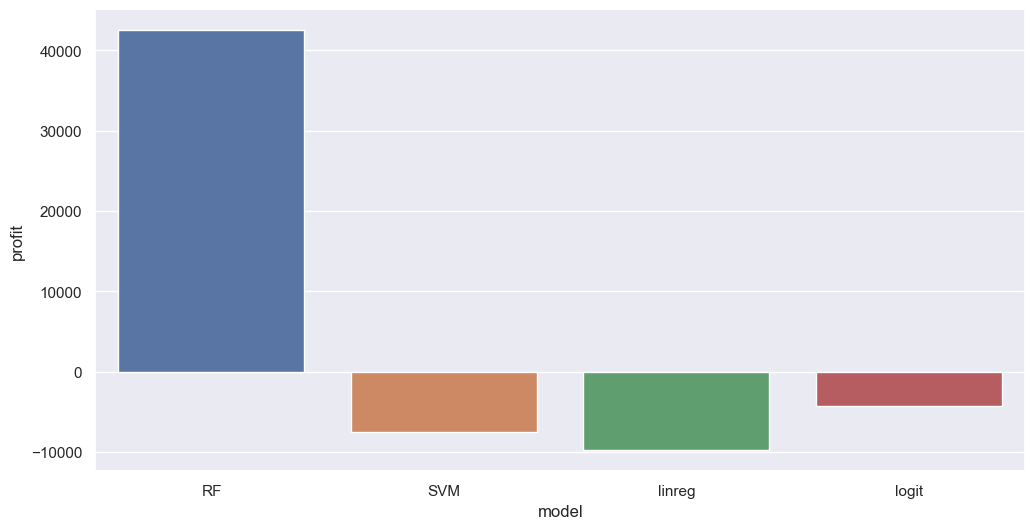

In [37]:
## Visualize the result
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize' : (12,6)})
sns.barplot(x='model', y='profit', data = pred_model3_grp , estimator = np.mean)